# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [19]:
# download the dataset from: Wine Quality Data Set
dataset_wine = pd.read_csv("./wine_quality_red.tsv", sep="\t")

# check the dataset if has missing values
print(dataset_wine.isnull().sum())

# print the number of features in the dataset
print(f"{len(dataset_wine.columns)} features in the dataset:")

# display the first 10 rows of the dataset
dataset_wine.head(10)

# remove few coluumns so total is 10 columns
dataset_wine = dataset_wine.drop(['sulphates', 'alcohol'], axis=1)

# print the number of features in the dataset
print(f"{len(dataset_wine.columns)} features in the dataset:")

# display the first 10 rows of the dataset again.
dataset_wine.head(10)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64
12 features in the dataset:
10 features in the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,5


Download the CSV file from the link provided in the code. Use the isnull method to check for any null values. Verify the total number of columns, and since the requirement is for 10 columns, remove the last two columns while keeping the target column. Finally, display the first 10 rows.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [27]:
# display list of columns
dataset_wine.columns

# check the target value's range
print(dataset_wine['target'].unique())

[5 6 7 4 8 3]


#### target column
The column `target` is the dependent variable, This value represents the wine's quality rating, and it ranges from 3 to 8.

### The feature column
The columns below are the feature columns (or input variables) that will be used to predict the target quality score.

#### fixed acidity
Measures sourness of the wine, usually it's the balance of the value can be use as good wine.

#### volatile acidity
Measures the sourness of the wine, usually the more it contains will not be good for the wine.

#### citric acid
Also describe the sourness of the wine, but more naturally compared with the fixed or volatile acidity.

#### pH
`pH` usually will be between 3 and 4, it use to describe how strong is the sourness, and the color the wine. 
Data described as 3.0 to 3.4 often is white wine, 3.4 to 3.8 is red wine and sweet wine is usually below 3.4. 

#### residual sugar
Measures the amount of the sugar inside the wine.

#### chlorides
Measures the amount of the salt inside the wine.

#### free sulfur dioxide
The amount of free sulfur dioxide can be use for preservative.

#### total sulfur dioxide
The total of sulfur dioxide, it's the combination from free sulfur dioxide which use for preservative, and bound sulfur dioxide which coming from chemically bound.

#### density
Density used in wine for describe wine's alcohol and sugar, usually high alcohol leads to lower density, and high sugar leads to higher density.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [ ]:
pd.set_option('display.max_columns', None)

# check the data information, types or missing values.
print(dataset_wine.info())

# check the first 5 records
print(dataset_wine.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   target                1599 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 125.1 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6     

In [ ]:
# check the data satistics 
print(dataset_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

target_distribution_matplotlib.png saved.


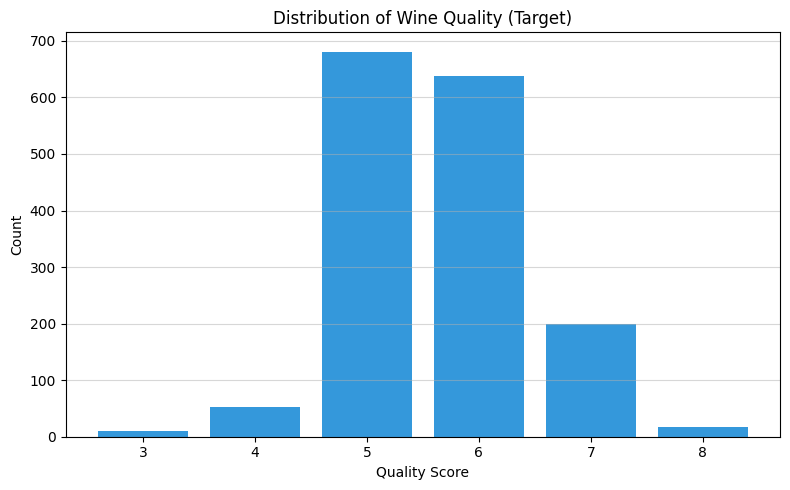

In [ ]:
# create bar chart for target column
quality_counts = dataset_wine['target'].value_counts().sort_index()
quality_scores = quality_counts.index
counts = quality_counts.values

plt.figure(figsize=(8, 5))
plt.bar(quality_scores.astype(str), counts, color='#3498db')
plt.title('Distribution of Wine Quality (Target)')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [6]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [7]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [8]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [9]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [10]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [11]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [12]:
# YOUR CODE HERE

YOUR ANSWERS HERE